

```
Visualize 3D Multiple linear regression

```



In [1]:
import numpy as np

###Data

In [2]:
X= [[150,100],[159,200],[170,350],[175,400],[179,500],[180,180],[189,159],[199,110],[199,400],[199,230],[235,120],[239,340],[239,360],[249,145],[249,400]]
Y= [0.73,1.39,2.03,1.45,1.82,1.32,0.83,0.53,1.95,1.27,0.49,1.03,1.24,0.55,1.3]

###Creating the data frame using pandas 

---
Based on Two independent features and one dependent feature called sales 



In [11]:
import pandas as pd
sales_data=pd.DataFrame(X,columns=['Price','AdSpends'])
sales_data['Sales']=pd.Series(Y)
sales_data


,Price,AdSpends,Sales
0,150,100,0.73
1,159,200,1.39
2,170,350,2.03
3,175,400,1.45
4,179,500,1.82
5,180,180,1.32
6,189,159,0.83
7,199,110,0.53
8,199,400,1.95
9,199,230,1.27


In [4]:
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


###Logistic regression model

---
Another way to apply linear regression Model by using Ordinary Least Square Method using Stats Model api


In [12]:
model = smf.ols(formula='Sales ~ Price + AdSpends', data=sales_data)
results_formula = model.fit()
results_formula.params

Intercept    1.633842
Price       -0.006379
AdSpends     0.003161
dtype: float64

####Coefficient of independent features

###Prepare Data for visulaization

###Here Meshgrid is expecting to make 3d plots that needs x , y , z axis

In [14]:
x_surf, y_surf = np.meshgrid(np.linspace(sales_data.Price.min(), sales_data.Price.max(), 100),np.linspace(sales_data.AdSpends.min(), sales_data.AdSpends.max(), 100))
onlyX = pd.DataFrame({'Price': x_surf.ravel(), 'AdSpends': y_surf.ravel()})
fittedY=results_formula.predict(exog=onlyX)

## converting  the predicted result in an array

In [15]:

fittedY=np.array(fittedY)

In [16]:
fittedY

array([0.99302132, 0.986642  , 0.98026269, ..., 1.63853568, 1.63215636,
       1.62577704])

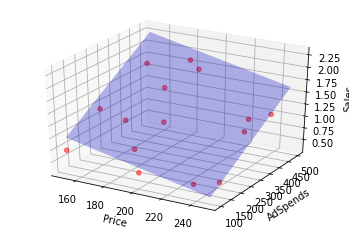

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')#111 basically signifies here no of rows and columns
ax.scatter(sales_data['Price'],sales_data['AdSpends'],sales_data['Sales'],c='red', marker='o', alpha=0.5)##alpha signifies the transparency
ax.plot_surface(x_surf,y_surf,fittedY.reshape(x_surf.shape), color='b', alpha=0.3)
ax.set_xlabel('Price')
ax.set_ylabel('AdSpends')
ax.set_zlabel('Sales')
plt.show()